# Outline                     

1. Key difference between RL and other AI fields
2. Genetic algorithm intuition on the example of real life evolution( birds example from blogpost, or how dogs were domesticated)
3. Key parts of GA(initial population, fitness function, selection, crossover, mutation)

4. Coding simple GA (dot product example, or guessing password)



# LINKS
1. **My blogpost whick was used as the main source** - https://medium.com/datadriveninvestor/genetic-algorithm-made-intuitive-with-natural-selection-and-python-project-from-scratch-3462f7793a3f

## Evolution related videos
1. **How evolution works** — https://www.youtube.com/watch?v=hOfRN0KihOU
2. **Simulating natural selection**(highly recommend this channel) — https://www.youtube.com/watch?v=0ZGbIKd0XrM
3. **Evoulution, Genetic engineering and much more**(also best channel on youtube imo) — https://www.youtube.com/watch?v=n__42UNIhvU&t=8s
    
## Programming related
1. **Playlist on Genetic Algorithm with p5.js**(easy stuff, but this guy explains quite great, thought very long and with JS) — https://www.youtube.com/playlist?list=PLRqwX-V7Uu6bJM3VgzjNV5YxVxUwzALHV
2. **Intro to Genetic Algorithm** — https://towardsdatascience.com/introduction-to-genetic-algorithms-including-example-code-e396e98d8bf3
3. **GA for finding shortest path between cities** - https://medium.com/gradientfire/introduction-to-genetic-algorithms-58263747b9a0

4. **After Genetic algorithm, you can move on to Neuroevolution(NEAT)** -https://www.youtube.com/playlist?list=PLRqwX-V7Uu6Yd3975YwxrR0x40XGJ_KGO
5. **Flappy bird Neuroevolution with python** — https://www.youtube.com/watch?v=MMxFDaIOHsE
## Cool stuff
1. **AI playin hide and seek** - https://www.youtube.com/watch?v=kopoLzvh5jY&t
2. **Funny running AI showed in workshop** - https://www.youtube.com/watch?v=gn4nRCC9TwQ
3. **Using Kapik and begemot as passwords was reference to this kargin - http://www.youtube.com/watch?v=SSz1WDodcZs&t=1m19s

Հիմնականում կամ դատա ենք ունենում x, y, կամ մենակ x ու ինչ-որ unsuvervised բան ենք անում, բայց ինչ եթե ոչ են ունենք ոչ են, բայց կարանք պռինցիպի ստանանանք։ Սենց օրինակ, ուզում ենք Mario խաղը խաղացող մոդել սարքենք։ Կարանք Վերցնենք մարիոն խաղանք, գրանցենք մեր քայլերը, ու գրանցեք թե կարացանք թագուհուն ազատենք թե չէ։ Հիմա ես ալգոիթմը որ անելու ենք եսօչ Genetic algorithm ա կոչվում, ինքը էվոլյուցիաիցա ոգեշնցված, եկեք նայենք ոնցա էվոլյուցիան աշխատում։ 




<img src = 'birds_V_shape.jpg'>


<img src = 'mukikner.png' height = 80%>

<img src='scheme.jpeg' height=65%>

# CODE

In [10]:
import random 
import string
import numpy as np

PASSWORD = "a"
POPULATION_SIZE = 10_000

## 1.Generating population

In [11]:
def generate_initial_population(password_length, population_size):
    """
    Function takes as input length of the guess to generate, and quantity
    of them. Returns a list of randomly generated guesses
    """
    population = []
    letters = string.ascii_letters + string.digits + " "

    for i in range(population_size):
        guess = ""
        for i in range(password_length):
            guess += random.choice(letters)

        population.append(guess)

    return population


print (generate_initial_population(5,3))
# outputs something like ['4a5jO', ' VQDc', 'x4bSr']


['TvRFs', 'H1O1A', 'jDSSU']


## 2. Evaluating guesses

In [12]:
def match_score(guess, target):
    """
    Functons takes two strings, and counts how many characters matched.
    Retruns an integer
    """
    score = 0
    for i in range(len(target)):
        if target[i] == guess[i]:
            score += 1
    return score
 
 # some examples
print (match_score("1dsaSf", "e34aSy")) # ->  prints  2 ('a' and "S" matched)
print (match_score("Elephant", "dlepghfd")) # -> prints 3 ("l","e", "p" matched)

2
3


## 2.2 Now lets do this for entire population

In [13]:
def score_for_population(password, population):
    """
    Functions uses match_score() and iterates through whole population
    returns list of integers representng score of every populaton member
    """
    scores = []
    for i in population:
        scores.append(match_score(password, i))
    return scores
 
# example
password = "Elephant"
population = ["dlepghfd", "12345678", "asdehant"]
 
print (score_for_population(password, population))
# "prints [3, 0, 4]"

[3, 0, 4]


## 3. Now when we have our population, let's chosse the best ones from them

In [14]:
def choose_parents(population, scores):
    """
    Function takes list of population members and list of their corresponding
    scores, and returns 2 members with the highest scores
    """
    father_index = np.array(scores).argmax()
    father = population[father_index]

    # we are removing the biggest elements from list,
    # than doing the same thing above to find second biggest.
    population.remove(father)
    scores.remove(scores[father_index])

    mother_index = np.array(scores).argmax()
    mother = population[mother_index]

    return [father, mother]

# example
population = ["dlepghfd", "12345678", "asdehant"]
scores = [3, 0, 4]

print(choose_parents(population, scores))


['asdehant', 'dlepghfd']


<p float='right'>
    <img src = 'ggh.jpg' height = 50%  width = 50%  align='left'/>
    <img src = 'orinak.jpg' height = 50%  width = 50% />
</p>

## Now when we have chosed parents we can generate new population from it

In [15]:
def generate_new_member(parent, parent_score):
    """
    Takes as input string which we will, pick letters from(parent),
    and quantity of letters to pick(parent_score)
    Returns a newly generated string
    """

    new_guess = ""

    letters = string.ascii_letters + string.digits + " "
    random_indexes = random.sample(range(len(parent)), parent_score)

    for i in range(len(parent)):
        if i in random_indexes:
            new_guess += parent[i]
        else:
            new_guess += random.choice(letters)

    return new_guess

# example 
parent = "aaaaa"
parent_score = 3

print(generate_new_member("aaaaa", 3))
# prints something like "aGaai", which means 0,2,3 indexes were picked 
# and the rest was filled with random characters
 

aaaN3


In [16]:
def mutate(population, chance):
    
    letters = string.ascii_letters + string.digits + " "
    for i in range(len(population)):
        if np.random.rand() < chance:
            rand_idx = random.choice(range(len(population[i])))
            new = list(population[i])
            new[rand_idx] = random.choice(letters)
            population[i] = ''.join(new)
            
    return population
            

## Above was just one member, lets make entire popilation

In [17]:
def generate_new_population(father, mother):
    """
    Takes as input parents and reproduces new population from them, using
    generate_new_member() function with alternatively father and mother.
    Returns list with new population members
    """
    population = []
    father_score = match_score(PASSWORD, father)
    mother_score = match_score(PASSWORD, mother)

    for i in range(POPULATION_SIZE):
        if i % 2 == 0:
            new_member = generate_new_member(father, father_score)
        else:
            new_member = generate_new_member(mother, mother_score)

        population.append(new_member)
        
    return population

# generate_new_population('bafbana', 'asdasd')

   #                          URAAA, verjacrecinq hamarya

In [21]:
PASSWORD = 'begemot kapik'
POPULATION_SIZE = 1_000

possibilites = 65 ** len(PASSWORD)
print (f'There are {possibilites} possible password')

generation_number = 0

initial_population = generate_initial_population(
    len(PASSWORD), POPULATION_SIZE)
scores = score_for_population(PASSWORD, initial_population)

father, mother = choose_parents(initial_population, scores)

for i in range(10_000):
    generation_number += 1
    new_population = generate_new_population(father, mother)
    new_population = mutate(new_population, 0.001) #perhaps won't use
    new_scores = score_for_population(PASSWORD, new_population)

    father, mother = choose_parents(new_population, new_scores)
    father_score = match_score(father, PASSWORD)
    mother_score = match_score(mother, PASSWORD)

    if max(father_score, mother_score) == len(PASSWORD):
        print(generation_number, father, mother)
        print("TOOK {} generations to finish".format(generation_number))
        break

    print(generation_number, father, mother, father_score)

print (f"Took {generation_number} generations")
print (f'Which means {POPULATION_SIZE * generation_number} guessis from {possibilites}')
print (f'Thats only {round(POPULATION_SIZE * generation_number / possibilites * 100, 20)}%')

There are 369720589101871337890625 possible password
1 vCg1iolqdApQF fug0moCS9cieQ 3
2 vPggmcl vvpBl GrgtmZtFv5i4h 4
3 idgwmxl BHpU6 3PgTmEB oa b9 4
4 hBgTmEtckakRT iNgDmDt I6Tt7 5
5 Fcg9mNtCkapEF h8avmTtFkaUiL 6
6 5ZAemItjkatiu bTgZmWhjkap4F 6
7 bzgZBstZkaN4k 4ngesRtnkatiW 6
8 begZ httfaelk btgUm0whkaNVk 6
9 btgMTocukapek beyeQht cve1k 7
10 bKgqxocTkaTik beCtToHDkapKk 7
11 bHgexoenkapit b2g2yocekRpik 8
12 bige2op5kapiB bNgeGoGakapiH 8
13 bNgemojIkamij brgeMoGkkaIiW 8
14 bNgemo22kammk b64emoIIkaxij 8
15 bNgemo6wkaGZk b0gemoRykassk 8
16 begemoT8kaCsJ beeemo6ZkaEZk 8
17 begHmoPzkapsl WeSemoE kaaZk 8
18 begHmowQkLpOk WjSemoLekapik 8
19 b8gHmokQkapXk begUmoOnkLpTk 8
20 beg8So4nkapyk bDgbmoCQkaptk 8
21 bRg mo8nkapXk b3g7moZvkapuk 8
22 beg mrtnlapdk b3g7moQdkauik 8
23 beg 5otD apBk b3gkmoLrkavik 8
24 bCg2moXCkaeik begYmoQrkLaik 8
25 beCemo48kLWik bqgDmoCoka8ik 8
26 bsgDmotKkaHiv beCemo4Ukgpiz 8
27 beXemo4NkspiN bigemo4Tkzpid 8
28 b Xemo2 kqpiN Uigemo9BkzpiB 8
29 bXPeMot kypiN b zemoZ Topik 8

In [44]:
# print ('YuHuuuuuu!!!!  ' * 10_000)

# QUIZ

Task is to get a boolean list of given length filled with all 1s(see output of the implementation below)

<img src='quiz.png'>

## Application: Circle Packing Problem

**Problem**: Given a 2D box and some existing circles inside, find the position and maximum diameter of a new circle that can fit in the remaining empty space without overlapping existing circles or going outside the box.

This is a challenging optimization problem because:
- We need to optimize both position (x, y) and radius (r)
- The objective is to maximize the radius
- Constraints are complex (no overlaps, stay within bounds)

### Step 1: Define the Problem Setup

C:\Users\hayk_\AppData\Local\Temp\ipykernel_6888\1980346547.py:42: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


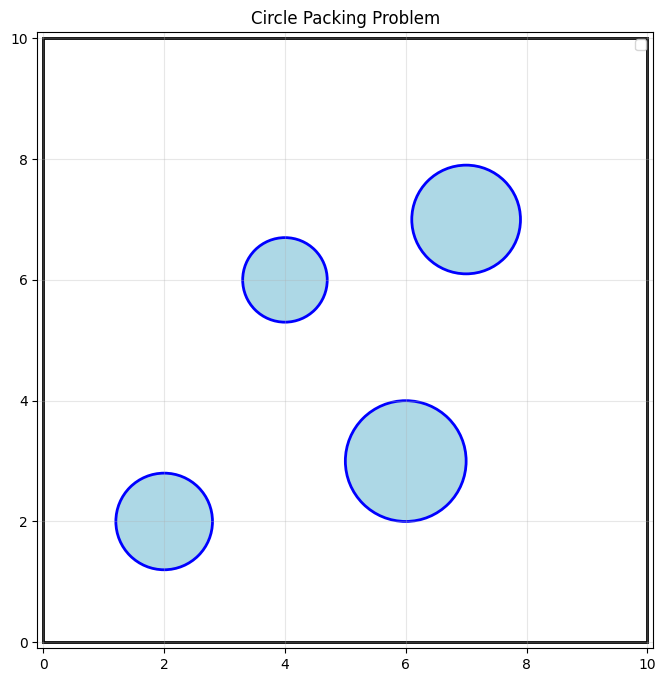

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import random

# Define the box and existing circles
class CirclePackingProblem:
    def __init__(self, box_width, box_height, existing_circles):
        """
        box_width, box_height: dimensions of the 2D box
        existing_circles: list of tuples [(x1, y1, r1), (x2, y2, r2), ...]
                         where (x, y) is center and r is radius
        """
        self.box_width = box_width
        self.box_height = box_height
        self.existing_circles = existing_circles
    
    def visualize(self, new_circle=None):
        """Visualize the box with existing circles and optionally a new circle"""
        fig, ax = plt.subplots(1, 1, figsize=(8, 8))
        
        # Draw box
        ax.add_patch(plt.Rectangle((0, 0), self.box_width, self.box_height, 
                                   fill=False, edgecolor='black', linewidth=2))
        
        # Draw existing circles
        for x, y, r in self.existing_circles:
            circle = Circle((x, y), r, color='lightblue', ec='blue', linewidth=2)
            ax.add_patch(circle)
        
        # Draw new circle if provided
        if new_circle is not None:
            x, y, r = new_circle
            circle = Circle((x, y), r, color='lightcoral', ec='red', linewidth=2, alpha=0.7)
            ax.add_patch(circle)
            ax.plot(x, y, 'r*', markersize=15, label=f'New circle (r={r:.3f})')
        
        ax.set_xlim(-0.1, self.box_width + 0.1)
        ax.set_ylim(-0.1, self.box_height + 0.1)
        ax.set_aspect('equal')
        ax.grid(True, alpha=0.3)
        ax.legend()
        ax.set_title('Circle Packing Problem')
        plt.show()

# Example setup
existing_circles = [
    (2, 2, 0.8),   # Circle at (2, 2) with radius 0.8
    (6, 3, 1.0),   # Circle at (6, 3) with radius 1.0
    (4, 6, 0.7),   # Circle at (4, 6) with radius 0.7
    (7, 7, 0.9),   # Circle at (7, 7) with radius 0.9
]

problem = CirclePackingProblem(box_width=10, box_height=10, existing_circles=existing_circles)
problem.visualize()

### Step 2: Design the Genetic Algorithm

**Chromosome Encoding**: Each individual represents a potential new circle with 3 genes:
- Gene 1: x-coordinate (position)
- Gene 2: y-coordinate (position)
- Gene 3: radius (what we want to maximize)

**Fitness Function**: The fitness should:
1. **Maximize** the radius (primary objective)
2. **Penalize** violations:
   - Overlapping with existing circles
   - Going outside the box boundaries
   
We'll use a penalty-based approach where valid solutions get positive fitness (equal to radius), and invalid solutions get negative penalties.

In [2]:
class CirclePackingGA:
    def __init__(self, problem, population_size=100, max_radius=3.0):
        self.problem = problem
        self.population_size = population_size
        self.max_radius = max_radius  # Maximum radius to consider
        
    def initialize_population(self):
        """Create initial random population"""
        population = []
        for _ in range(self.population_size):
            # Random x, y within box, random radius
            x = np.random.uniform(0, self.problem.box_width)
            y = np.random.uniform(0, self.problem.box_height)
            r = np.random.uniform(0.1, self.max_radius)
            population.append(np.array([x, y, r]))
        return population
    
    def calculate_fitness(self, individual):
        """
        Fitness function with penalties for constraint violations
        Returns: fitness value (higher is better)
        """
        x, y, r = individual
        
        # Check if circle is within box boundaries
        if x - r < 0 or x + r > self.problem.box_width:
            return -1000  # Penalty for going outside box (x-direction)
        if y - r < 0 or y + r > self.problem.box_height:
            return -1000  # Penalty for going outside box (y-direction)
        
        # Check for overlaps with existing circles
        for ex, ey, er in self.problem.existing_circles:
            distance = np.sqrt((x - ex)**2 + (y - ey)**2)
            if distance < r + er:  # Circles overlap
                # Penalty proportional to overlap amount
                overlap = (r + er) - distance
                return -100 * overlap
        
        # If all constraints satisfied, fitness = radius (we want to maximize)
        return r
    
    def selection(self, population, fitnesses):
        """Tournament selection"""
        tournament_size = 3
        selected = []
        
        for _ in range(len(population)):
            # Random tournament
            indices = random.sample(range(len(population)), tournament_size)
            tournament_fitnesses = [fitnesses[i] for i in indices]
            winner_idx = indices[np.argmax(tournament_fitnesses)]
            selected.append(population[winner_idx].copy())
        
        return selected
    
    def crossover(self, parent1, parent2):
        """Arithmetic crossover (blend positions and radius)"""
        alpha = np.random.random()
        child1 = alpha * parent1 + (1 - alpha) * parent2
        child2 = (1 - alpha) * parent1 + alpha * parent2
        return child1, child2
    
    def mutate(self, individual, mutation_rate=0.1, mutation_strength=0.3):
        """Gaussian mutation"""
        if np.random.random() < mutation_rate:
            # Mutate position
            individual[0] += np.random.normal(0, mutation_strength * self.problem.box_width)
            individual[1] += np.random.normal(0, mutation_strength * self.problem.box_height)
            
            # Mutate radius
            individual[2] += np.random.normal(0, mutation_strength * self.max_radius)
            
            # Clip to valid ranges
            individual[0] = np.clip(individual[0], 0, self.problem.box_width)
            individual[1] = np.clip(individual[1], 0, self.problem.box_height)
            individual[2] = np.clip(individual[2], 0.01, self.max_radius)
        
        return individual
    
    def evolve(self, generations=100, mutation_rate=0.15, elite_size=2):
        """Main GA loop"""
        population = self.initialize_population()
        best_fitness_history = []
        avg_fitness_history = []
        
        for gen in range(generations):
            # Evaluate fitness
            fitnesses = [self.calculate_fitness(ind) for ind in population]
            
            # Track statistics
            best_fitness = max(fitnesses)
            avg_fitness = np.mean(fitnesses)
            best_fitness_history.append(best_fitness)
            avg_fitness_history.append(avg_fitness)
            
            if gen % 10 == 0:
                print(f"Generation {gen}: Best fitness = {best_fitness:.4f}, Avg = {avg_fitness:.4f}")
            
            # Elitism: keep best individuals
            elite_indices = np.argsort(fitnesses)[-elite_size:]
            elites = [population[i].copy() for i in elite_indices]
            
            # Selection
            selected = self.selection(population, fitnesses)
            
            # Crossover and mutation
            next_population = elites.copy()
            
            for i in range(0, len(selected) - 1, 2):
                parent1, parent2 = selected[i], selected[i + 1]
                child1, child2 = self.crossover(parent1, parent2)
                child1 = self.mutate(child1, mutation_rate)
                child2 = self.mutate(child2, mutation_rate)
                next_population.extend([child1, child2])
            
            # Ensure population size remains constant
            population = next_population[:self.population_size]
        
        # Return best solution
        final_fitnesses = [self.calculate_fitness(ind) for ind in population]
        best_idx = np.argmax(final_fitnesses)
        
        return population[best_idx], best_fitness_history, avg_fitness_history

### Step 3: Run the Algorithm and Visualize Results

In [3]:
# Run the genetic algorithm
ga = CirclePackingGA(problem, population_size=150, max_radius=3.0)
best_circle, best_history, avg_history = ga.evolve(generations=100, mutation_rate=0.15)

print(f"\n{'='*50}")
print(f"Best circle found:")
print(f"  Position: ({best_circle[0]:.3f}, {best_circle[1]:.3f})")
print(f"  Radius: {best_circle[2]:.3f}")
print(f"  Fitness: {ga.calculate_fitness(best_circle):.4f}")
print(f"{'='*50}")

Generation 0: Best fitness = 1.3070, Avg = -539.1587
Generation 10: Best fitness = 1.4512, Avg = -58.7050
Generation 20: Best fitness = 1.4512, Avg = -66.5630
Generation 30: Best fitness = 1.5741, Avg = -156.5870
Generation 20: Best fitness = 1.4512, Avg = -66.5630
Generation 30: Best fitness = 1.5741, Avg = -156.5870
Generation 40: Best fitness = 1.5741, Avg = -147.1812
Generation 50: Best fitness = 1.5741, Avg = -88.3306
Generation 40: Best fitness = 1.5741, Avg = -147.1812
Generation 50: Best fitness = 1.5741, Avg = -88.3306
Generation 60: Best fitness = 1.5741, Avg = -79.5467
Generation 70: Best fitness = 1.8613, Avg = -109.6822
Generation 60: Best fitness = 1.5741, Avg = -79.5467
Generation 70: Best fitness = 1.8613, Avg = -109.6822
Generation 80: Best fitness = 1.8613, Avg = -112.6270
Generation 90: Best fitness = 1.8613, Avg = -99.8444
Generation 80: Best fitness = 1.8613, Avg = -112.6270
Generation 90: Best fitness = 1.8613, Avg = -99.8444

Best circle found:
  Position: (1.947

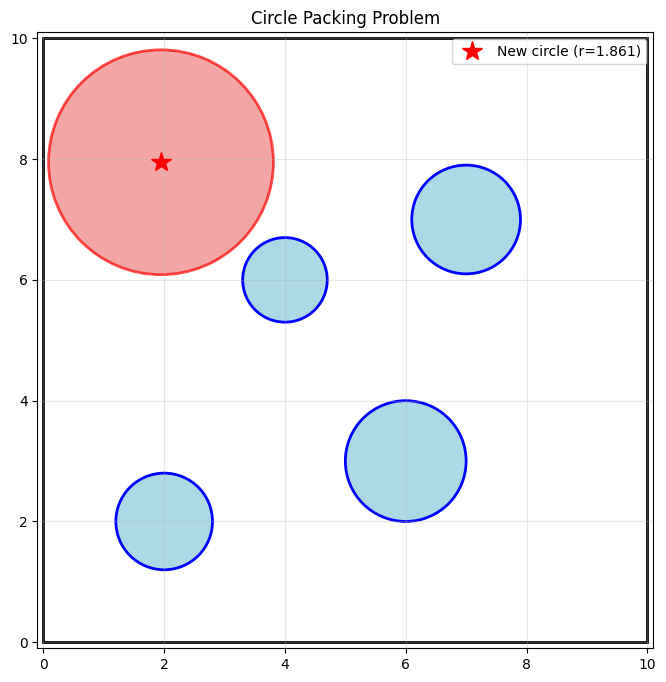

In [4]:
# Visualize the solution
problem.visualize(new_circle=best_circle)

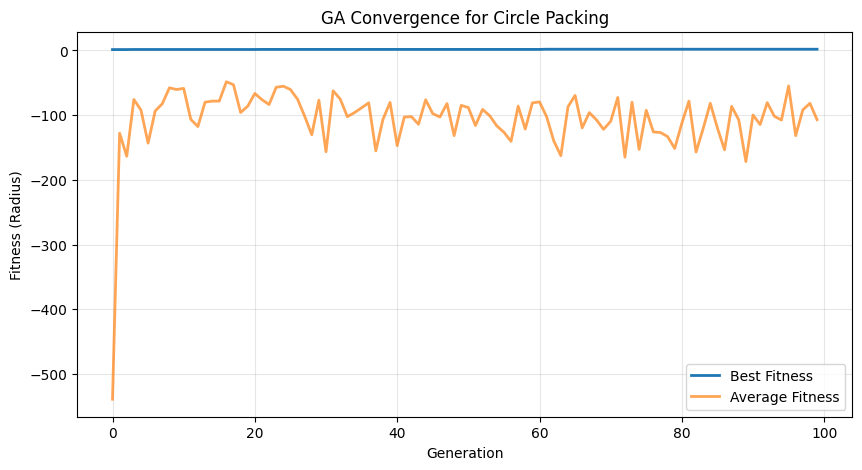

In [5]:
# Plot convergence
plt.figure(figsize=(10, 5))
plt.plot(best_history, label='Best Fitness', linewidth=2)
plt.plot(avg_history, label='Average Fitness', linewidth=2, alpha=0.7)
plt.xlabel('Generation')
plt.ylabel('Fitness (Radius)')
plt.title('GA Convergence for Circle Packing')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### Step 4: Key Design Decisions Explained

**1. Chromosome Encoding:**
- Direct encoding: `[x, y, radius]`
- Real-valued genes allow for precise positioning
- Alternative: Could use binary encoding, but real values are more natural for continuous optimization

**2. Fitness Function Design:**
```python
fitness = {
    radius,                    if all constraints satisfied
    -1000,                     if outside box
    -100 * overlap_amount,     if overlapping with existing circles
}
```
- **Maximizes radius** (primary objective)
- **Large penalties** ensure invalid solutions are avoided
- **Proportional penalty** for overlaps guides the algorithm toward valid regions

**3. Genetic Operators:**
- **Arithmetic crossover**: Blends parent genes, good for continuous spaces
- **Gaussian mutation**: Small random changes, strength controlled by parameter
- **Tournament selection**: Balances exploration vs exploitation

**4. Parameter Tuning:**
- `population_size = 150`: Larger population = more diversity
- `mutation_rate = 0.15`: 15% chance of mutation per gene
- `elite_size = 2`: Preserve best 2 solutions each generation
- `generations = 100`: Enough for convergence on this problem

### Step 5: Testing with Different Scenarios

Scenario 2: Densely packed circles


C:\Users\hayk_\AppData\Local\Temp\ipykernel_6888\1980346547.py:42: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


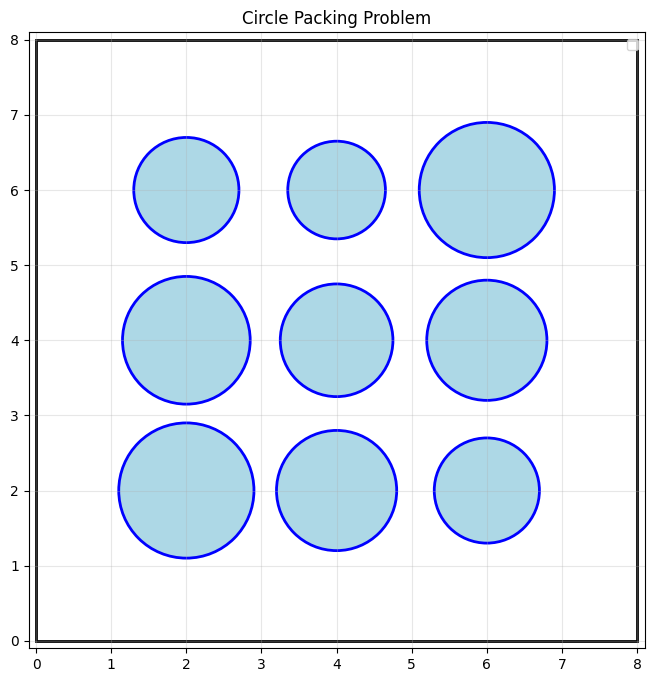

Generation 0: Best fitness = 0.6524, Avg = -482.8846
Generation 10: Best fitness = 0.6671, Avg = -62.7811
Generation 10: Best fitness = 0.6671, Avg = -62.7811
Generation 20: Best fitness = 0.6671, Avg = -86.6888
Generation 20: Best fitness = 0.6671, Avg = -86.6888
Generation 30: Best fitness = 0.6671, Avg = -110.7709
Generation 30: Best fitness = 0.6671, Avg = -110.7709
Generation 40: Best fitness = 0.6671, Avg = -84.7072
Generation 40: Best fitness = 0.6671, Avg = -84.7072
Generation 50: Best fitness = 0.6671, Avg = -98.4329
Generation 50: Best fitness = 0.6671, Avg = -98.4329
Generation 60: Best fitness = 0.6671, Avg = -118.6069
Generation 60: Best fitness = 0.6671, Avg = -118.6069
Generation 70: Best fitness = 0.6671, Avg = -98.1876
Generation 70: Best fitness = 0.6671, Avg = -98.1876
Generation 80: Best fitness = 0.6757, Avg = -52.4175
Generation 80: Best fitness = 0.6757, Avg = -52.4175
Generation 90: Best fitness = 0.6757, Avg = -86.2420
Generation 90: Best fitness = 0.6757, Avg 

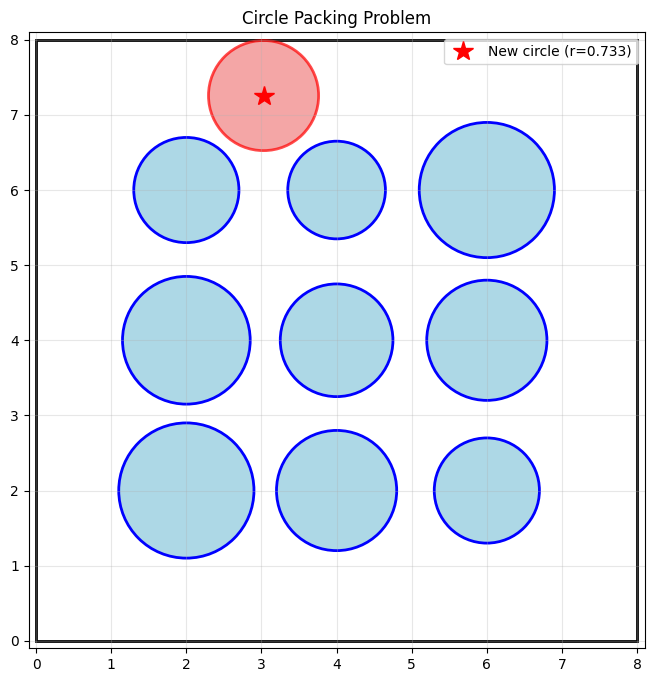

In [6]:
# Scenario 2: More densely packed circles
crowded_circles = [
    (2, 2, 0.9),
    (4, 2, 0.8),
    (6, 2, 0.7),
    (2, 4, 0.85),
    (4, 4, 0.75),
    (6, 4, 0.8),
    (2, 6, 0.7),
    (4, 6, 0.65),
    (6, 6, 0.9),
]

problem2 = CirclePackingProblem(box_width=8, box_height=8, existing_circles=crowded_circles)
print("Scenario 2: Densely packed circles")
problem2.visualize()

# Run GA on this scenario
ga2 = CirclePackingGA(problem2, population_size=200, max_radius=2.0)
best_circle2, _, _ = ga2.evolve(generations=150, mutation_rate=0.2)

print(f"Best circle: position ({best_circle2[0]:.3f}, {best_circle2[1]:.3f}), radius {best_circle2[2]:.3f}")
problem2.visualize(new_circle=best_circle2)

### Advantages and Limitations of GA for This Problem

**Advantages:**
1. ✅ **Handles complex constraints** naturally through penalty functions
2. ✅ **No gradient required** - works even though constraints are non-differentiable
3. ✅ **Finds good solutions** quickly (not necessarily optimal, but practical)
4. ✅ **Robust** to local optima due to population-based search
5. ✅ **Easy to implement** and understand

**Limitations:**
1. ❌ **No guarantee of global optimum** - heuristic method
2. ❌ **Computationally expensive** - needs many fitness evaluations
3. ❌ **Parameter sensitive** - requires tuning (population size, mutation rate, etc.)
4. ❌ **Slower than specialized methods** for simple geometric problems

**Alternatives to Consider:**
- **Random search with adaptive sampling**: Simpler, sometimes equally effective
- **Simulated annealing**: Good for continuous optimization with constraints
- **Gradient-free optimization** (e.g., Nelder-Mead): Faster for smooth problems
- **Specialized circle packing algorithms**: Use geometric properties for better efficiency